Value at Risk of a portfolio, using the variance covariance method

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as datetime
import time
import os
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%run finance.ipynb #import of the functions defined in the finance.ipynb notebook

Select the stocks to include in our portfolio

In [2]:
tickers = ['AAPL','GS','COST','DIS','JD']
start_date = '2019-01-01'
end_date = '2023-04-22'

In [3]:
ptf = getPtf(tickers,start_date,end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Assign random weights to the stocks

In [4]:
#try the returns on the portfolio
n = randomWeights(len(ptf.columns.levels[0]))
ptf_t = list()
ptf_agg = pd.DataFrame()
print(n)

[0.03975091 0.36249616 0.2119976  0.30591207 0.07984326]


In [6]:
for each in ptf.loc[:,ptf.columns.levels[0][0]].columns:
    test = ptf.xs(each, level = 1, axis = 1)*n
    test_2 = pd.DataFrame(test.sum(axis = 1))
    test_2.columns = [each]
    ptf_t.append(test_2)
ptf_agg = pd.concat(ptf_t, axis = 1)
ptf_agg['Daily Return'] = ptf_agg['Adj Close'].pct_change()
ptf_agg['Log Return'] = np.log(ptf_agg['Adj Close']/ptf_agg['Adj Close'].shift(1)) #np.log(1+df['adj close'].pct_change())
ptf_agg['Cumulative Return'] = np.exp(np.log1p(ptf_agg['Daily Return']).cumsum())
#ptf_agg.drop('Volume',inplace = True)

In [7]:
ptf_agg

,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low,Daily Return,...,Volume,Adj Open,Adj High,Adj Low,Daily Return,Log Return,Cumulative Return,MA 10 Days,MA 20 Days,MA 50 Days
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,135.860957,139.761520,135.270903,139.533602,131.618388,1.766166e+07,128.218908,131.834283,127.666302,NaN,...,1.766166e+07,128.218908,131.834283,127.666302,NaN,NaN,NaN,0.000000,0.000000,0.000000
2019-01-03,138.418805,139.339537,135.932175,136.535089,128.767628,3.559501e+07,130.567446,131.427351,128.205162,-0.021659,...,3.559501e+07,130.567446,131.427351,128.205162,-0.021659,-0.021897,0.978341,0.000000,0.000000,0.000000
2019-01-04,138.818951,141.934364,137.621383,140.850143,132.835728,2.513135e+07,130.912627,133.866926,129.791400,0.031593,...,2.513135e+07,130.912627,133.866926,129.791400,0.031593,0.031104,1.009249,0.000000,0.000000,0.000000
2019-01-07,140.876459,142.994431,139.267434,141.665256,133.609941,2.211579e+07,132.864093,134.858353,131.366423,0.005828,...,2.211579e+07,132.864093,134.858353,131.366423,0.005828,0.005811,1.015131,0.000000,0.000000,0.000000
2019-01-08,143.044631,143.561845,140.332954,142.170597,134.107974,1.819608e+07,134.913254,135.411038,132.396215,0.003728,...,1.819608e+07,134.913254,135.411038,132.396215,0.003728,0.003721,1.018915,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,258.032627,260.878065,256.730190,259.689696,259.689696,7.400222e+06,258.032630,260.878058,256.730193,0.006193,...,7.400222e+06,258.032630,260.878058,256.730193,0.006193,0.006174,1.973050,256.140994,253.257289,259.138251
2023-04-18,256.766336,260.011349,255.341665,258.866755,258.866755,9.924410e+06,256.766334,260.011351,255.341665,-0.003169,...,9.924410e+06,256.766334,260.011351,255.341665,-0.003169,-0.003174,1.966798,256.393049,253.867977,258.791390
2023-04-19,258.124481,259.752773,256.482277,258.871273,258.871273,9.357483e+06,258.124477,259.752778,256.482276,0.000017,...,9.357483e+06,258.124477,259.752778,256.482276,0.000017,0.000017,1.966832,256.762495,254.292537,258.447318


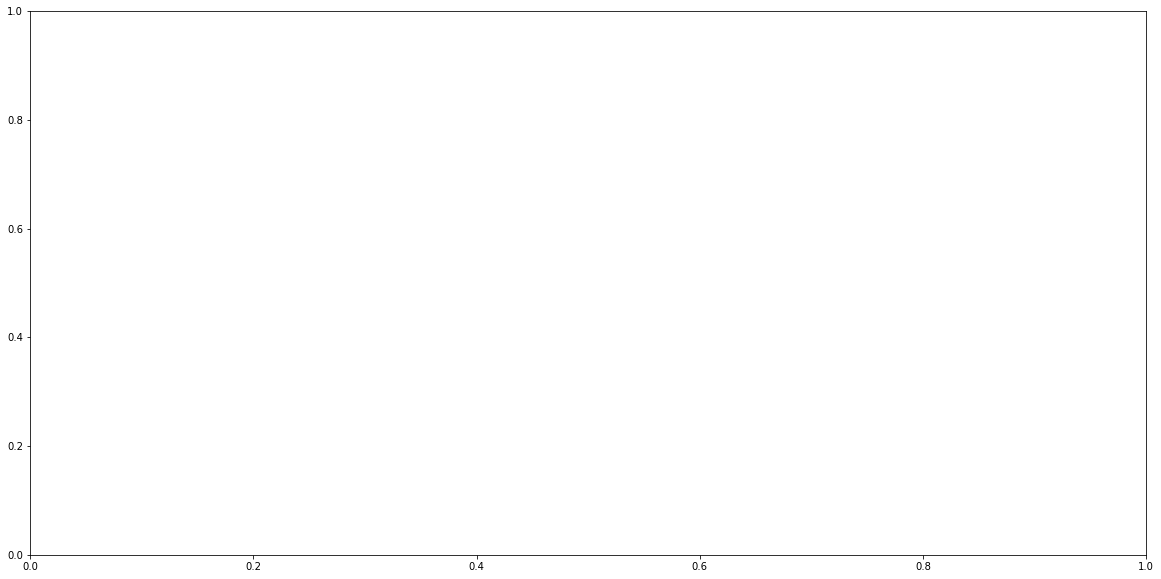

In [10]:
fig, ax1 = plt.subplots(figsize = (20,10))
sns.lineplot(data = ptf_agg[['Adj Close','MA 10 Days','MA 20 Days','MA 50 Days']])

The variance-covariance method looks at historical price movements (standard deviation, mean price) of a given equity or portfolio of equities over a specified lookback period. It then uses probability theory to calculate the maximum loss within your specified confidence interval.

Steps to calculate the VaR of a portfolio
In order to calculate the VaR of a portfolio, you can follow the steps below:

Calculate periodic returns of the stocks in the portfolio
Create a covariance matrix based on the returns
Calculate the portfolio mean and standard deviation
(weighted based on investment levels of each stock in portfolio)

Calculate the inverse of the normal cumulative distribution (PPF) with a specified confidence interval, standard deviation, and mean
Estimate the value at risk (VaR) for the portfolio by subtracting the initial investment from the calculation

1) Create a covariance matrix based on the returns

In [11]:
cov_matrix = ptf.xs('Daily Return', level = 1, axis = 1).cov()
cov_matrix

,JD,DIS,COST,GS,AAPL
JD,0.001191,0.000211,0.000132,0.000220,0.000306
DIS,0.000211,0.000473,0.000115,0.000283,0.000224
COST,0.000132,0.000115,0.000240,0.000126,0.000193
GS,0.000220,0.000283,0.000126,0.000462,0.000240
AAPL,0.000306,0.000224,0.000193,0.000240,0.000456


2) Calculate the portfolio mean and standard deviation

In [12]:
#average returns for each stock
avg_ret = ptf.xs('Daily Return', level = 1, axis = 1).mean()

#calculate the mean returns and the std dev for the poortfolio, using the dot product to normalise against the weights
port_mean = avg_ret.dot(n)
port_stdev = np.sqrt(n.T.dot(cov_matrix).dot(n))


initial_investment = 10000


mean_investment = (1+port_mean) * initial_investment
stdev_investment = initial_investment * port_stdev


conf_level1 = 0.05

3) Calculate the inverse of the normal cumulative distribution (PPF) with a specified confidence interval, standard deviation, and mean

In [13]:
# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
# as calculated above
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

4) Estimate the value at risk (VaR) for the portfolio by subtracting the initial investment from the calculation in step 4

In [14]:
var_1d1 = initial_investment - cutoff1
var_1d1

260.18320337944897

Here we are saying with 95% confidence that our portfolio of 10000 USD will not exceed losses greater than 227 USD over a one day period.

Value at risk over n-day time period

1 day VaR @ 95% confidence: 260.18
2 day VaR @ 95% confidence: 367.95
3 day VaR @ 95% confidence: 450.65
4 day VaR @ 95% confidence: 520.37
5 day VaR @ 95% confidence: 581.79
6 day VaR @ 95% confidence: 637.32
7 day VaR @ 95% confidence: 688.38
8 day VaR @ 95% confidence: 735.91
9 day VaR @ 95% confidence: 780.55
10 day VaR @ 95% confidence: 822.77
11 day VaR @ 95% confidence: 862.93
12 day VaR @ 95% confidence: 901.3
13 day VaR @ 95% confidence: 938.1
14 day VaR @ 95% confidence: 973.52
15 day VaR @ 95% confidence: 1007.69


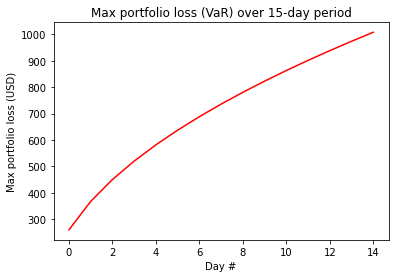

In [15]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")